![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 18 - Máquinas de Vectores Soporte

En esta sesión práctica vamos a trabajar con un algoritmo muy conocido y muy utilizado que se llama SVM (*Support Vector Machines*).

Una de sus cualidades principales es que es capaz de trabajar con conjuntos de datos en los que el número de ejemplos es menor que el número de atributos. Esto ha provocado que sea muy utilizado en campos como por ejemplo la genética, donde se suele disponer de datos de muy pocas personas (decenas o centenas), pero de las que se tiene información de miles de genes.

Las SVM obtienen un buen rendimiento en estas situaciones porque durante el entrenamiento buscan el hiperplano que maximiza el margen entre los ejemplos de las dos clases:

![hiperplanos](fig_hiperplanos.png)  (Imagen tomada de: *J.J. del Coz and O. Luaces: Aprendizaje Automático: Conceptos Básicos y Avanzados, ch. Métodos Kernel y Máquinas de Vectores Soporte, pp. 163–200. Pearson, 2006*)

En la figura podemos ver ejemplos de dos clases y multitud de hiperplanos capaces de separar los ejemplos positivo de los ejemplos negativos. Sin embargo, todos elegiríamos el hiperplano destacado en negrita si tuviésemos que escoger uno de ellos puesto que es el que se encuentra más alejado de los ejemplos de ambas clases. Eso es lo que tratan de hacer las máquinas de vectores soporte.

Las máquinas de vectores soporte se pueden utilizar para resolver diferentes tareas entre las que se encuentran las tareas de clasificación (lo veremos en esta práctica), de regresión (lo veremos en una práctica más adelante) y de detección de anomalías (se verá en otra asignatura).

Vamos a cargar un conjunto de datos para empezar a practicar:


#####################################################
#### Cargamos conjunto de datos 1
#####################################################


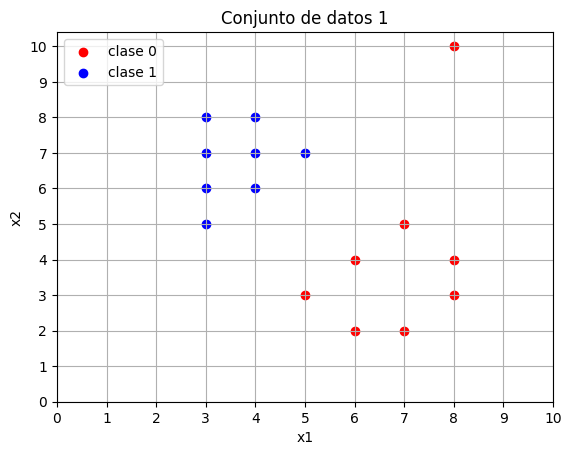

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


def pinta(X_clase0, X_clase1, texto):
    fig, ax = plt.subplots()
    ax.scatter(X_clase0[:, 0], X_clase0[:, 1], c='r', label='clase 0')
    ax.scatter(X_clase1[:, 0], X_clase1[:, 1], c='b', label='clase 1')
    ax.set_title(texto)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend(loc="upper left")
    ax.grid(True)
    ax.set_xticks(list(range(0,11)))
    ax.set_yticks(list(range(0,11)))
    plt.show()

print("\n#####################################################")
print("#### Cargamos conjunto de datos 1")
print("#####################################################")

df = pd.read_excel('ejemplo.xlsx', sheet_name='datos1')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[y==0].values, X[y==1].values, 'Conjunto de datos 1')

Vemos que se trata de un sencillo problema en el que los ejemplos de las dos clases son fácilmente separables.

En `sckit-learn`, para resolver tareas de clasificación utilizando másquinas de vectores soporte solemos utilizar el algoritmo `SVC`: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [2]:
# creamos una SVM con kernel lineal
sys_svc = SVC(kernel='linear')

# entrenamos
sys_svc.fit(X,y)

SVC(kernel='linear')

A la hora de crear el sistema hemos añadido `kernel='linear'`. Este hiperparámetro sirve para indicar que queremos que se busquen soluciones lineales. En la próxima sesión nos centraremos en los *kernel*, así que por ahora, simplemente tenemos que quedarnos con que estamos imponiendo a la SVM que el hiperplano que separe ambas clases sea lineal.

Una vez entrenado el modelo podemos hacer uso de la función `DecisionBoundaryDisplay()` (https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator) que nos permite representar la superficie correspondiente a cada clase tras ser dividido el espacio por el hiperplano:

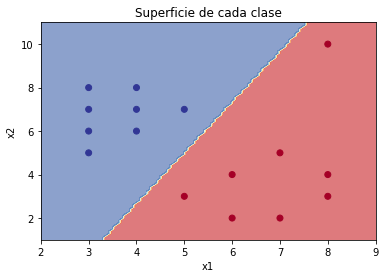

In [39]:
# se genera el display con el espacio coloreado
disp = DecisionBoundaryDisplay.from_estimator(sys_svc, X, response_method="predict", cmap=plt.cm.RdYlBu, alpha=0.6, xlabel=X.columns[0], ylabel=X.columns[1])

# se incorporan los datos
disp.ax_.scatter(X.values[:,0], X.values[:,1], c=y, cmap=plt.cm.RdYlBu)
disp.ax_.set_title('Superficie de cada clase')
plt.show()

Como podemos apreciar, el hiperplano separador trata de mantener la distancia con los ejemplos de ambas clases.

## 18.1 Los vectores soporte

SVM aprende una función, $f(z)=w^Tz+b$, que tratará de otorgar una valoración mayor que cero ($f(z)>0$) si el ejemplo $z$ es de la clase positiva y menor que cero si $z$ es de la clase negativa (nosotros estamos trabajando con las clases 0 y 1, así que SVM transformará estas clases en -1 y 1).

SVM utiliza una combinación lineal de los ejemplos para calcular $w$ $\left(w=\sum^n_{i=1} \alpha^{(i)} y^{(i)} x^{(i)} \right)$, siendo $x^{(i)}$ un ejemplo del conjunto de entrenamiento e $y^{(i)}$ su clase correspondiente, de tal forma que $\alpha^{(i)}$ indica el peso del ejemplo i-ésimo en el cálculo de $w$. Si sustituimos queda lo siguiente:

$$
f(z)=w^T z + b = \left( \sum^n_{i=1} \alpha^{(i)} y^{(i)} x^{(i)} \right)^T z + b = \sum^n_{i=1} \alpha^{(i)} y^{(i)} \langle x^{(i)}, z \rangle + b 
$$

Todos los ejemplos que tengan su valor $\alpha$ a 0, serán ejemplos que no intervendrán en el cálculo de $w$ y, por tanto, **podrían ser eliminados del conjunto de entrenamiento** y seguiríamos obteniendo la misma solución. Esto hace que las SVM también sean interesantes por su capacidad para eliminar ejemplos irrelevantes para el modelo, con el consiguiente ahorro en cuanto a memoria y almacenamiento.

Por otro lado, los ejemplos que tiene un valor de $\alpha$ distinto de cero son conocidos como **vectores soporte**. Una vez entrenado un modelo podemos acceder a ellos a través de los siguientes atributos:

In [40]:
print("Número de vectores soporte de cada clase:", sys_svc.n_support_)
print("Índices de los vectores soporte:", sys_svc.support_)
print("Vectores soporte:")
print(sys_svc.support_vectors_)
print("Alfas:", np.abs(sys_svc.dual_coef_))

Número de vectores soporte de cada clase: [2 1]
Índices de los vectores soporte: [12 15  4]
Vectores soporte:
[[ 5.  3.]
 [ 8. 10.]
 [ 5.  7.]]
Alfas: [[0.41659342 0.38879123 0.80538466]]


Podemos también representarlos gráficamente:

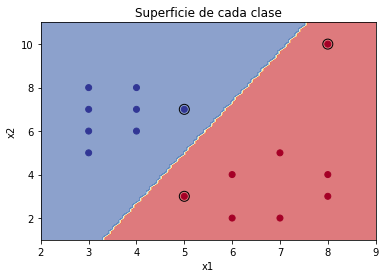

In [41]:
# se genera el display con el espacio coloreado
disp = DecisionBoundaryDisplay.from_estimator(sys_svc, X, response_method="predict", cmap=plt.cm.RdYlBu, alpha=0.6, xlabel=X.columns[0], ylabel=X.columns[1])

# se incorporan los datos
disp.ax_.scatter(X.values[:,0], X.values[:,1], c=y, cmap=plt.cm.RdYlBu)

# se marcan los vectores de soporte
disp.ax_.scatter(sys_svc.support_vectors_[:,0], sys_svc.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')
disp.ax_.set_title('Superficie de cada clase')
plt.show()

Vemos que con pocos vectores soporte ya puede crear un hiperplano que separa ambas clases perfectamente.

## 18.2 w y b

Como estamos generando una función lineal, también podremos acceder a los valores de $w$ y $b$:

In [42]:
print("w:", sys_svc.coef_)
print("b:", sys_svc.intercept_)

w: [[-1.1663737  0.5      ]]
b: [3.33157552]


## 18.3 Compromiso entre maximizar el margen y minimizar el error

Al igual que sucedía con la regresión logística, las SVM tienen un hiperparámetro que actúa como equilibrio entre maximizar el margen y minimizar el error. Ese hiperparámetro es la `C`. Si la `C` toma valores muy grandes le estaremos dando mucha importancia a acertar todos los ejemplos del conjunto de entrenamiento (y tal vez sobreajustándonos) y si la `C` toma valores muy pequeños le estaremos dando mucha importancia a maximizar el margen (y tal vez subajustándonos):

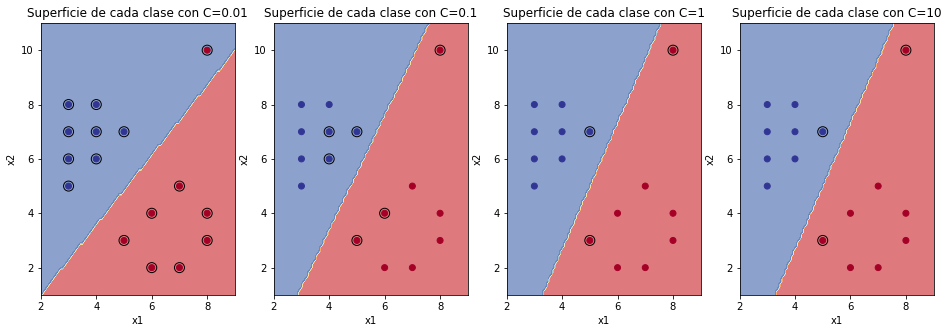

In [43]:
# creamos una figura con 4 gráficas
fig, sub = plt.subplots(1, 4)
fig.set_size_inches(16, 5)

col = 0
for C in [0.01, 0.1, 1, 10]:
    sys_svc.set_params(C=C)  # cambiamos la C
    sys_svc.fit(X,y)         # entrenamos

    disp = DecisionBoundaryDisplay.from_estimator(sys_svc, X, response_method="predict", cmap=plt.cm.RdYlBu, 
        ax=sub[col], alpha=0.6, xlabel=X.columns[0], ylabel=X.columns[1])
    sub[col].scatter(X.values[:,0], X.values[:,1], c=y, cmap=plt.cm.RdYlBu)
    sub[col].scatter(sys_svc.support_vectors_[:,0], sys_svc.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')
    sub[col].set_title('Superficie de cada clase con C='+str(C))
    col = col + 1

Vemos que valores pequeños de `C` hacen que haya más vectores soporte y que se falle algún ejemplo. El ejemplo rojo de la parte superior tal vez esté mal etiquetado y fallarlo en el entrenamiento sea bueno. O tal vez no. 

A partir de cierto valor de `C` el hiperplano no varía puesto que ya está clasificando todos los ejemplos de manera correcta.

Vamos a cargar un conjunto de datos muy similar (solo hemos desplazado un ejemplo) y vamos a ver cómo afecta la `C`:


#####################################################
#### Cargamos conjunto de datos 2
#####################################################


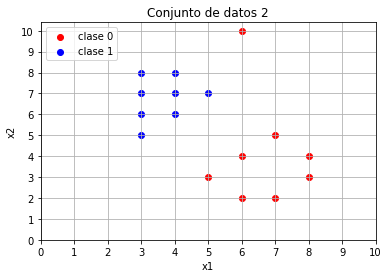


#####################################################
#### Superficie con C
#####################################################


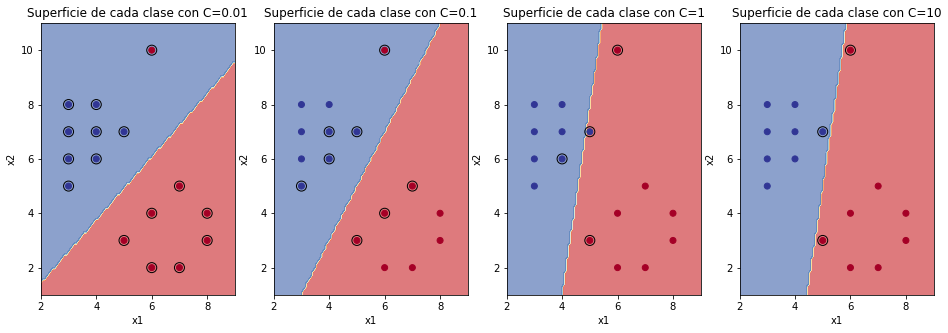

In [44]:
print("\n#####################################################")
print("#### Cargamos conjunto de datos 2")
print("#####################################################")

df = pd.read_excel('ejemplo.xlsx', sheet_name='datos2')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[y==0].values, X[y==1].values, 'Conjunto de datos 2')

print("\n#####################################################")
print("#### Superficie con C")
print("#####################################################")

# creamos una figura con 4 gráficas
fig, sub = plt.subplots(1, 4)
fig.set_size_inches(16, 5)

col = 0
for C in [0.01, 0.1, 1, 10]:
    sys_svc.set_params(C=C)  # cambiamos la C
    sys_svc.fit(X,y)         # entrenamos

    disp = DecisionBoundaryDisplay.from_estimator(sys_svc, X, response_method="predict", cmap=plt.cm.RdYlBu, 
        ax=sub[col], alpha=0.6, xlabel=X.columns[0], ylabel=X.columns[1])
    sub[col].scatter(X.values[:,0], X.values[:,1], c=y, cmap=plt.cm.RdYlBu)
    sub[col].scatter(sys_svc.support_vectors_[:,0], sys_svc.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')
    sub[col].set_title('Superficie de cada clase con C='+str(C))
    col = col + 1

En este conjunto vemos cómo al aumentar la `C` el hiperplano se va desplazando para tratar de clasificar correctamente todos los ejemplos, lográndolo finalmente. Sin embargo, vemos que resulta un hiperplano un tanto forzado, con lo que tal vez nos hayamos sobreajustado (quizá el ejemplo rojo de la parte superior esté mal etiquetado).

## 18.4 Solución no lineal

¿Y qué pasa si es imposible encontrar un hiperplano que separe correctamente ambas clases? Vamos a verlo cargando una nueva modificación de este mismo conjunto de datos:


#####################################################
#### Cargamos conjunto de datos 3
#####################################################


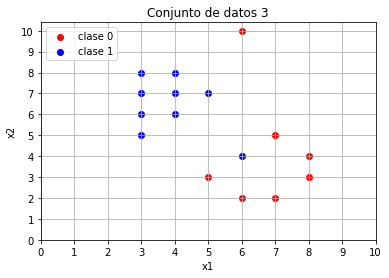


#####################################################
#### Superficie con C
#####################################################


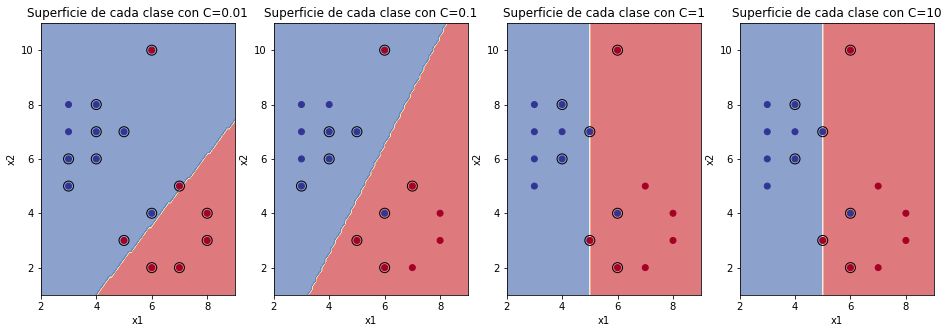

In [45]:
print("\n#####################################################")
print("#### Cargamos conjunto de datos 3")
print("#####################################################")

df = pd.read_excel('ejemplo.xlsx', sheet_name='datos3')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[y==0].values, X[y==1].values, 'Conjunto de datos 3')

print("\n#####################################################")
print("#### Superficie con C")
print("#####################################################")

# creamos una figura con 4 gráficas
fig, sub = plt.subplots(1, 4)
fig.set_size_inches(16, 5)

col = 0
for C in [0.01, 0.1, 1, 10]:
    sys_svc.set_params(C=C)  # cambiamos la C
    sys_svc.fit(X,y)         # entrenamos

    disp = DecisionBoundaryDisplay.from_estimator(sys_svc, X, response_method="predict", cmap=plt.cm.RdYlBu, 
        ax=sub[col], alpha=0.6, xlabel=X.columns[0], ylabel=X.columns[1])
    sub[col].scatter(X.values[:,0], X.values[:,1], c=y, cmap=plt.cm.RdYlBu)
    sub[col].scatter(sys_svc.support_vectors_[:,0], sys_svc.support_vectors_[:,1], s=100, facecolors='none', edgecolors='k')
    sub[col].set_title('Superficie de cada clase con C='+str(C))
    col = col + 1

Busca el hiperplano que le hace fallar el menor número de ejemplos, pero siempre fallará alguno.

Para abordar este tipo de problemas debemos utilizar un kernel diferente al kernel lineal y eso es algo que veremos en la próxima sesión práctica.

## 18.5 Probabilidades
Utilizando el método `predict_proba()` se puede obtener también la probabilidad de pertenencia de los ejemplos a cada una de las clases. 

El cálculo de las probabilidades no se obtiene de manera directa, sino que se debe utilizar lo que se conoce como el *Platt scaling*. Por esta razón, si queremos utilizar las probabilidades obtenidas por una SVM, debemos indicar `probability=True` en el objeto `SVC` que hayamos creado.

El cálculo de probabilidades en SVM tiene un par de desventajas:
1. el *Platt scaling* utiliza una validación cruzada para el cálculo de las probabilides, con lo que el entrenamiento se ralentiza
2. al utilizarse una validación cruzada para la estimación de las probabilidades, a veces puede suceder que la clase predicha no coincida con las probabilidades predichas, es decir, puede que prediga que es de la clase 1 pero otorgue una probabilidad de 0.49 de ser de la clase 1 y una probabilidad de 0.51 de ser de la clase 0. Raramente sucede, pero es una posibilidad.

A modo de curiosidad, decir que el *Platt scaling* es un algortimo ideado por John C. Platt y del que podéis obtener más detalles en: 
- https://home.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf 
- https://en.wikipedia.org/wiki/Platt_scaling

## Ejercicios

1. Carga el fichero **biodeg.data** (es un archivo de texto). 
2. Busca el mejor valor de C y evalúa el rendimiento final del modelo (utiliza una `GridSearchCV` dentro de una validación cruzada como se vio en la sesión 11). Observa que valores altos de C pueden hacer que los experimentos sean interminables
3. Estandariza los atributos y repite el paso 2

Estos ejercicios no es necesario entregarlos.